<h1 style="text-align:center;">Text Analytics for National Institutes of Health</h1><br>
<h2>Word Clouds, Sentiment Analysis and Topic Modeling</h2>
<br>
<h3>Libraries used : dplyr, tidytext, ggplot2, SnowballC, wordcloud, reshape2, RTextTools, tm, wordcloud, topicmodels, slam</h3>
<h2 style="text-align:right;">Sthanu Ramakrishnan</h2>

In [1]:
#For Word Tokenization, Plotting frequent words, Creating Word Cloud
library(dplyr)
library(tidytext)
library(ggplot2)
library(SnowballC) #to use wordstem
library(wordcloud)
library(reshape2) #to turn the data frame into a matrix with reshape2’s acast()

#For Topic Modelling
library(RTextTools)
library(tm)
library(wordcloud)
library(topicmodels)
library(slam)

Warning message:
"package 'dplyr' was built under R version 3.5.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidytext' was built under R version 3.5.2"Warning message:
"package 'ggplot2' was built under R version 3.5.2"Warning message:
"package 'SnowballC' was built under R version 3.5.2"Warning message:
"package 'wordcloud' was built under R version 3.5.2"Loading required package: RColorBrewer
Warning message:
"package 'RColorBrewer' was built under R version 3.5.2"Warning message:
"package 'reshape2' was built under R version 3.5.2"Warning message:
"package 'RTextTools' was built under R version 3.5.2"Loading required package: SparseM
Warning message:
"package 'SparseM' was built under R version 3.5.2"
Attaching package: 'SparseM'

The following object is masked from 'package:base':

    backsolve


Attac

In [2]:
# Reading the data
data <- read.csv("E:/+++UNCC/Academics/2019_Spring-DSBA 6211_Advanced Business Analytics/psychcentral_data.csv"
                            , sep=","
                            , header = TRUE
                            , strip.white = TRUE
                            , na.strings = c("NA","","NaN","?","")
                            , stringsAsFactors = FALSE # This is to remove the error "Input must be a character vector of any length or a list of character vectors, each of which has a length of 1." that appears when using "unnest_tokens" 
                            )

In [3]:
colnames(data)

[1] "row"       "q_subject" "q_content" "answers"

In [4]:
nrow(data)

[1] 8360

In [5]:
#First 2 rows of data
head(data,n=1)

row,q_subject,q_content,answers
0,Saying Goodbye For Now,nIts been a pleasure hosting this service over the past three years at Psych Central However for now the time has come to move on The thriving community of hundreds of people answering one anothers questions just never happened despite our best effort and no lack of new and interesting questions And dealing with certain housekeeping chores was becoming burdensome technicallychallenging and timeconsumingn n I want to thank bella Clyde Chemar and Edahn for trying their best to help others and providing thousands of answers to people seeking advice and guidancen n We never say never around here so theres always the possibility that we will bring this service back sometime in the future But for now were shutting it downn n In the meantime if youre looking for another place on Psych Central to ask a question of others we actually do have such a place on our forums or click on Community in the menu aboven n httpforumspsychcentralcomn n Youll need to register for a new account there it uses a different registration system than Answers if you dont already have one on the forums But its just as easy to ask a question there and of course freen n On behalf of Psych Central I wish you all the bestn n,NA


<h1 style="color:blue; text-align:center;">Text Analytics on "q_content" column</h1>

In [6]:
# Word Tokenize the "q_content" column using tidytext
# To use the pipe operator '%>%' we need to import library "dplyr"
# To use "unnest_tokens" we need to import library "tidytext"
tidy_text_questions <- data %>%
    unnest_tokens(word, q_content)

# a new column called "word" which lists all the words in q_content as individual records is created
tidy_text_questions[1,]

row,q_subject,answers,word
0,Saying Goodbye For Now,NA,nits


In [7]:
# stop_words is a default dataframe in tidytext library with 1149 words
head(stop_words)
dim(stop_words)

word,lexicon
a,SMART
a's,SMART
able,SMART
about,SMART
above,SMART
according,SMART


[1] 1149    2

In [8]:
# Number of records before removing stop words
dim(tidy_text_questions)[1]

[1] 2190512

In [9]:
# Removing the stop words
tidy_text_questions <- tidy_text_questions %>%
  anti_join(stop_words)

Joining, by = "word"


In [10]:
# Number of records after removing stop words
dim(tidy_text_questions)[1]

[1] 651450

In [11]:
# Top 5 words
tidy_text_questions %>%
  count(word, sort = TRUE) %>% top_n(5)

Warning message:
"package 'bindrcpp' was built under R version 3.5.2"Selecting by n


word,n
im,13012
dont,11197
feel,9168
time,6697
life,4464


In [12]:
# Words with frequency greater than 2000
tidy_text_questions %>%
  count(word, sort = TRUE) %>% filter(n>2000)

word,n
im,13012
dont,11197
feel,9168
time,6697
life,4464
ive,4403
people,4233
told,4150
friends,4045
love,3281


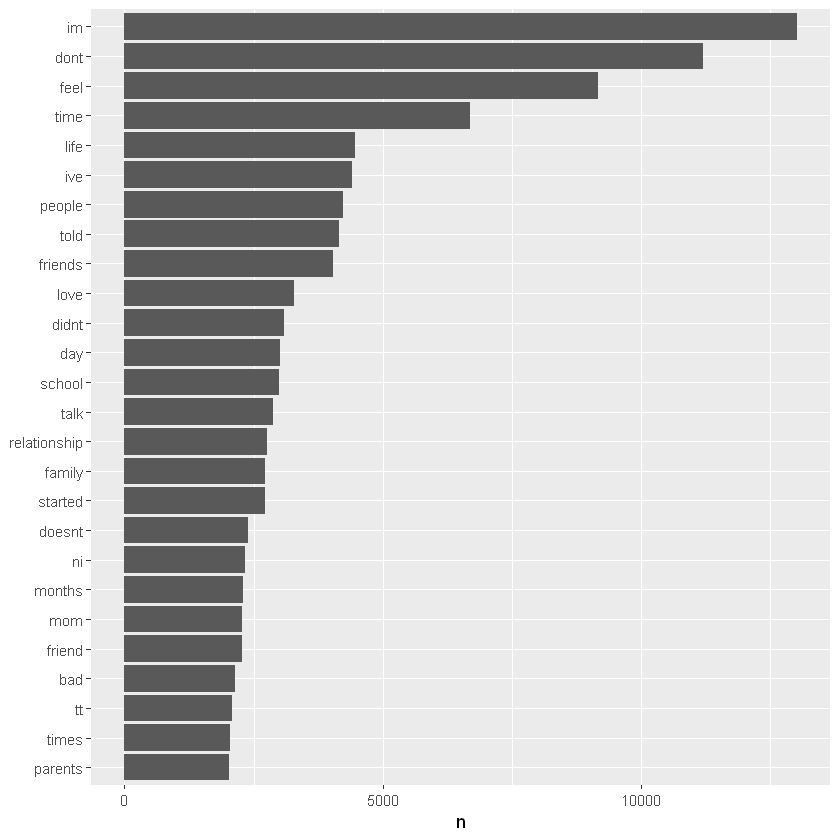

In [13]:
# Bar Plot of words that have frequency greater than 2000
tidy_text_questions %>%
  count(word, sort = TRUE) %>%
  filter(n > 2000) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  geom_bar(stat = "identity") +
  xlab(NULL) +
  coord_flip()

In [14]:
# wordStem does stemming on the word tokens. Hence words like dont and didnt will be converted into a single word
tidy_text_questions_stemmed <- data %>%
    unnest_tokens(word, q_content) %>%
        mutate(word = wordStem(word))  %>%
            anti_join(stop_words)

Joining, by = "word"


In [15]:
#Number of words after removing stop words
dim(tidy_text_questions)[1]
#Number of words after stemming and removing stop words
dim(tidy_text_questions_stemmed)[1]

[1] 651450

[1] 738053

In [16]:
# Top 5 words in questions after stemming and removing stop words
tidy_text_questions_stemmed %>%
  count(word, sort = TRUE) %>% top_n(5)

Selecting by n


word,n
im,13013
feel,12905
dont,11197
time,8755
becaus,8106


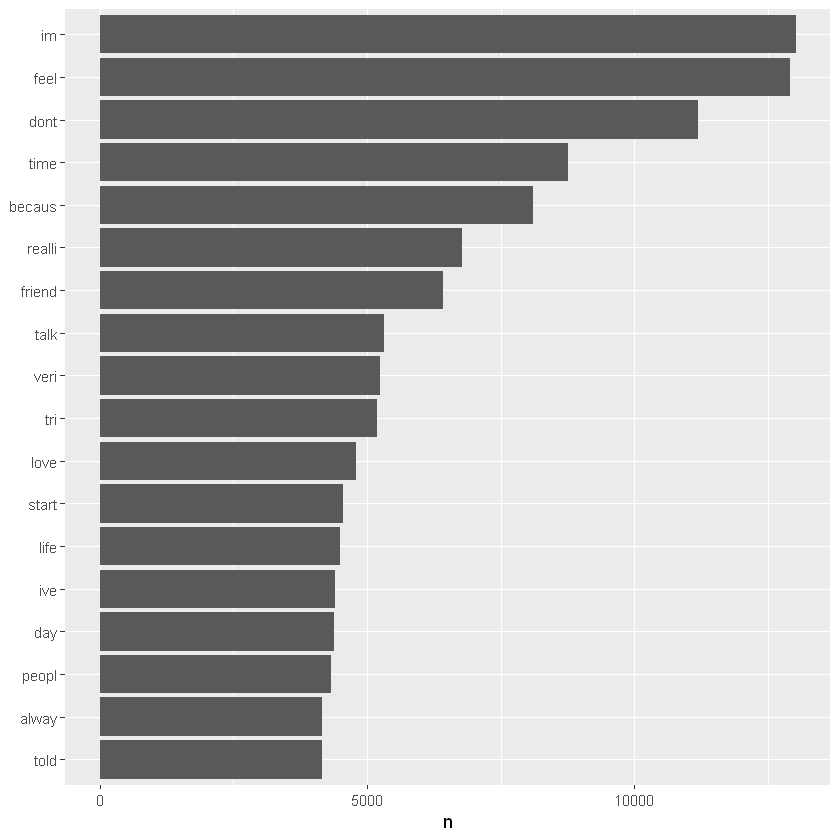

In [17]:
# Bar Plot of stemmed words having frequency greater than 4000
tidy_text_questions_stemmed %>%
  count(word, sort = TRUE) %>%
  filter(n > 4000) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  geom_bar(stat = "identity") +
  xlab(NULL) +
  coord_flip()

Joining, by = "word"


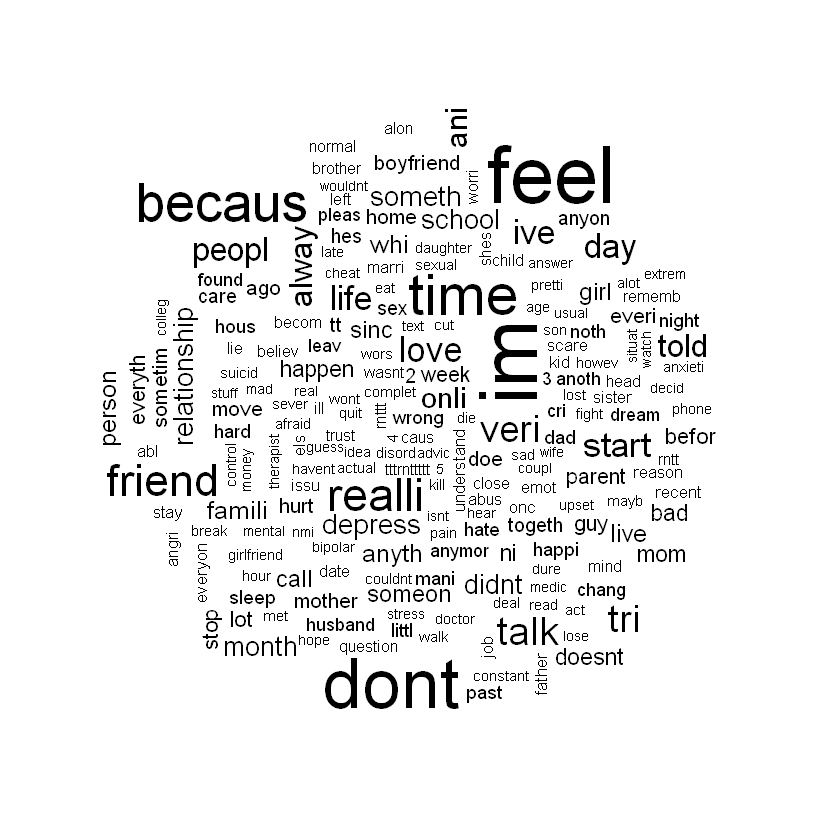

In [18]:
# Word cloud of the 200 frequent words
tidy_text_questions_stemmed %>%
  anti_join(stop_words) %>%
  count(word) %>%
  with(wordcloud(word, n, max.words = 200))

Joining, by = "word"


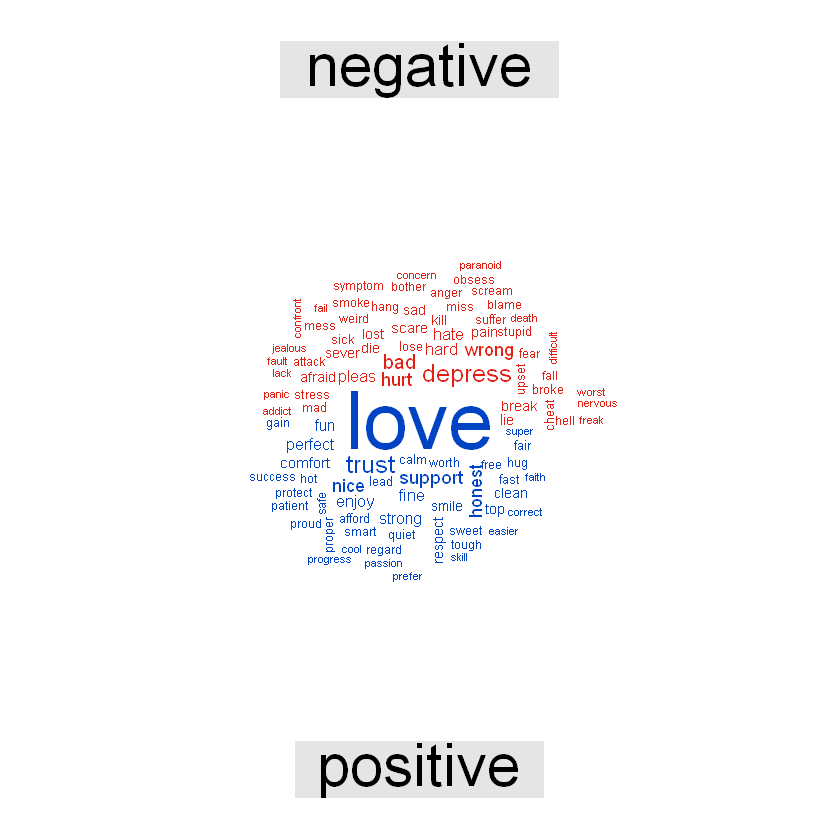

In [19]:
# Word cloud of the 100 frequent words with sentiment representation (Red means negative words, Blue means positive words)
tidy_text_questions_stemmed %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("#e21f12", "#0044c4"),
                   max.words = 100)

<h1 style="color:blue; text-align:center;">Text Analytics on "answers" column</h1>

In [20]:
# Word Tokenize the "answers" column using tidytext
tidy_text_answers <- data %>%
    unnest_tokens(word, answers)

In [21]:
# Number of records before removing stop words
dim(tidy_text_answers)[1]

[1] 3783093

In [22]:
# Removing the stop words
tidy_text_answers <- tidy_text_answers %>%
  anti_join(stop_words)

Joining, by = "word"


In [23]:
# Number of records after removing stop words
dim(tidy_text_answers)[1]

[1] 1131938

In [24]:
# Top 5 words
tidy_text_answers %>%
  count(word, sort = TRUE) %>% top_n(5)

Selecting by n


word,n
dont,18010
feel,13279
people,10334
youre,10162
time,9729


In [25]:
# Words with frequency greater than 4000
tidy_text_answers %>%
  count(word, sort = TRUE) %>% filter(n>4000)

word,n
dont,18010
feel,13279
people,10334
youre,10162
time,9729
im,9664
life,9169
ni,8913
talk,6245
relationship,5557


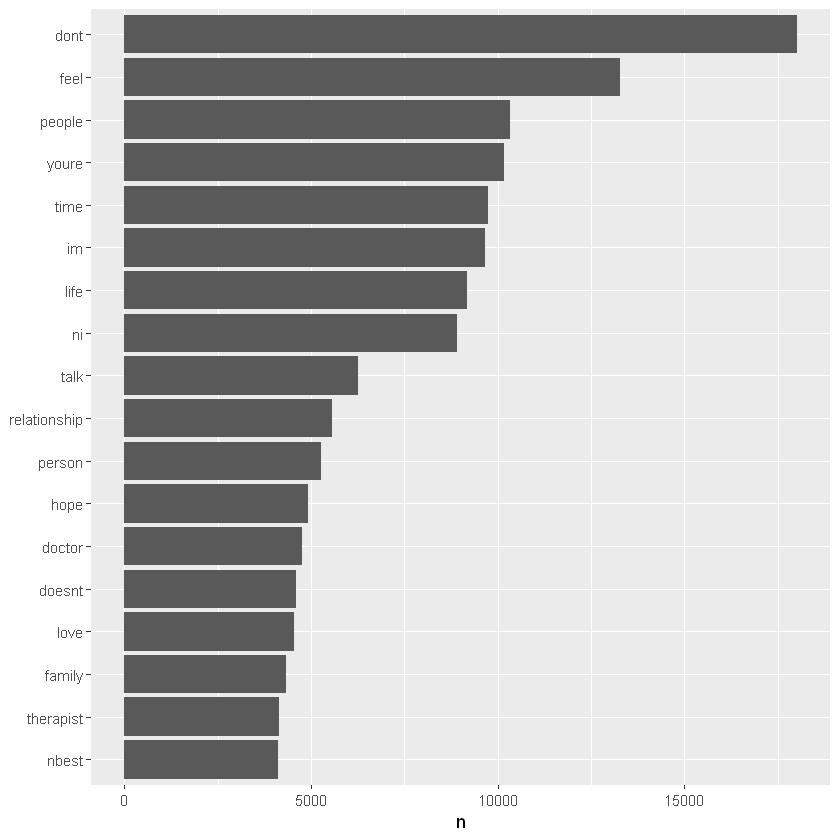

In [26]:
# Bar Plot of words that have frequency greater than 2000
tidy_text_answers %>%
  count(word, sort = TRUE) %>%
  filter(n > 4000) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  geom_bar(stat = "identity") +
  xlab(NULL) +
  coord_flip()

In [27]:
# wordStem does stemming on the word tokens.
tidy_text_answers_stemmed <- data %>%
    unnest_tokens(word, answers)
tidy_text_answers_stemmed <- tidy_text_answers_stemmed[complete.cases(tidy_text_answers_stemmed), ] #Removing the NA's

tidy_text_answers_stemmed <- tidy_text_answers_stemmed %>%
                                mutate(word = wordStem(word))  %>%
                                    anti_join(stop_words)

Joining, by = "word"


In [28]:
#Number of words after removing stop words
dim(tidy_text_answers)[1]
#Number of words after stemming and removing stop words
dim(tidy_text_answers_stemmed)[1]

[1] 1131938

[1] 1255037

In [29]:
# Top 5 words in answers after stemming and removing stop words
tidy_text_answers_stemmed %>%
  count(word, sort = TRUE) %>% top_n(5)

Selecting by n


word,n
feel,21402
dont,17894
time,11589
tri,10842
peopl,10483


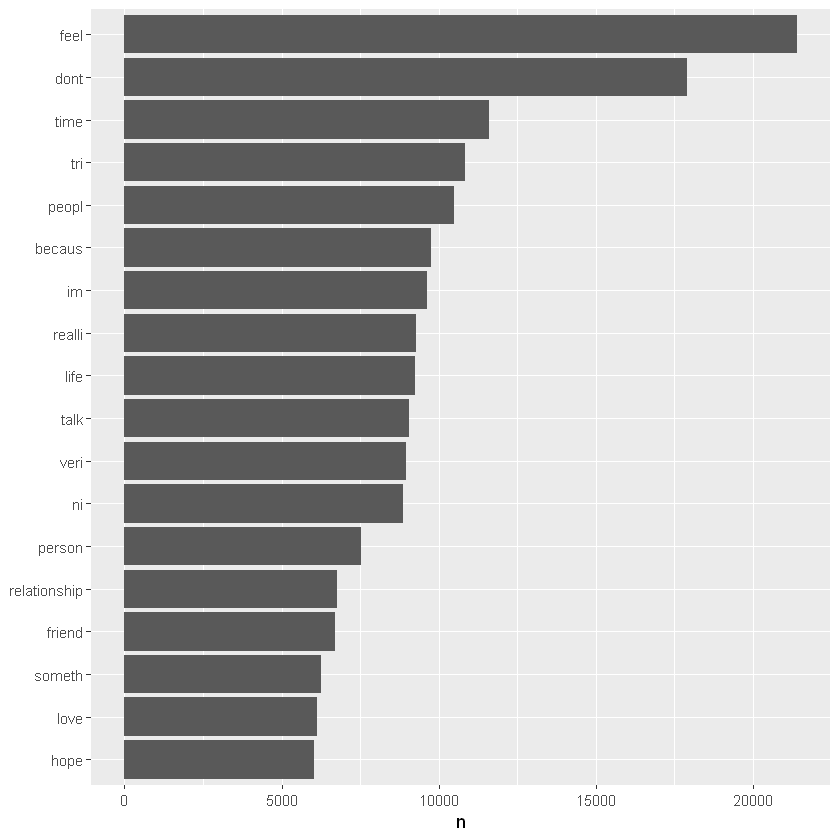

In [30]:
# Bar Plot of stemmed words having frequency greater than 6000
tidy_text_answers_stemmed %>%
  count(word, sort = TRUE) %>%
  filter(n > 6000) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  geom_bar(stat = "identity") +
  xlab(NULL) +
  coord_flip()

Joining, by = "word"


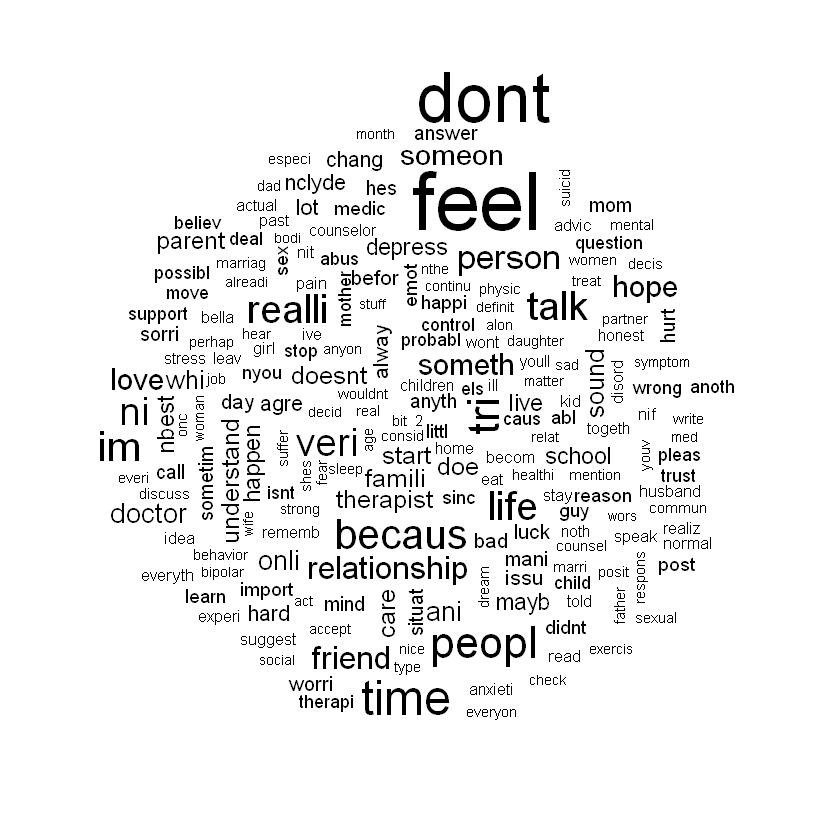

In [31]:
# Word cloud of the 200 frequent words
tidy_text_answers_stemmed %>%
  anti_join(stop_words) %>%
  count(word) %>%
  with(wordcloud(word, n, max.words = 200))

Joining, by = "word"


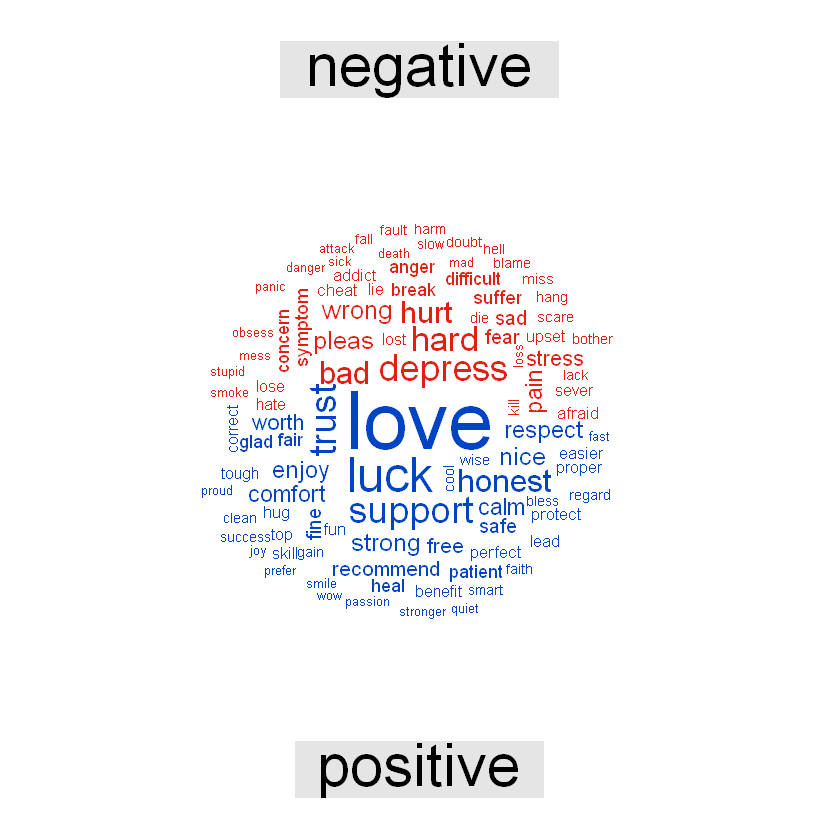

In [32]:
# Word cloud of the 100 frequent words with sentiment representation (Red means negative words, Blue means positive words)
tidy_text_answers_stemmed %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("#e21f12", "#0044c4"),
                   max.words = 100)

<h1 style="color:blue; text-align:center;">Topic Modeling on q_content</h1>

In [33]:
data <- data[1:1000,] # We perform LDA on the rows 1 through 1000 in the data.

In [34]:
# Collection of documents is a corpus
corpus <- Corpus(VectorSource(data$q_content), readerControl=list(language="en"))
corpus

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1000

In [35]:
# Creates a matrix which describes the frequency of terms that occur in a collection of documents.
dtm <- DocumentTermMatrix(corpus, control = list(stopwords = TRUE, minWordLength = 2, removeNumbers = TRUE, removePunctuation = TRUE,  stemDocument = TRUE))
dtm

<<DocumentTermMatrix (documents: 1000, terms: 14258)>>
Non-/sparse entries: 110873/14147127
Sparsity           : 99%
Maximal term length: 92
Weighting          : term frequency (tf)

In [36]:
rowTotals <- apply(dtm , 1, sum) #Find the sum of words in each Document
tail(rowTotals)

995  996  997  998  999 1000 
 214   30  259  145  117   24

In [37]:
dtm.new   <- dtm[rowTotals> 0, ] #remove all docs without words
dtm.new

<<DocumentTermMatrix (documents: 1000, terms: 14258)>>
Non-/sparse entries: 110873/14147127
Sparsity           : 99%
Maximal term length: 92
Weighting          : term frequency (tf)

In [38]:
lda <- LDA(dtm.new, k = 5) # k is the number of topics to be found.
lda

A LDA_VEM topic model with 5 topics.

In [39]:
# per-topic-per-word probabilities are displayed in the column "beta"
lda_td <- tidy(lda)
lda_td[1,]
options(scipen=999) # To prevent Scientifc Notation
print("Probabilities for each word occuring in each of the 5 topics represent in decimals (not in scienftific notation)")
lda_td[1,]

topic,term,beta
1,aboven,7.834985e-05


[1] "Probabilities for each word occuring in each of the 5 topics represent in decimals (not in scienftific notation)"


topic,term,beta
1,aboven,0.00007834985


In [40]:
# Top 10 terms in each of the 5 topics
top_terms <- lda_td %>%
  group_by(topic) %>%
  top_n(10, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)
top_terms

topic,term,beta
1,just,0.009864933
1,get,0.008326387
1,dont,0.007182152
1,now,0.007033414
1,like,0.006907351
1,school,0.006869170
1,time,0.006692500
1,one,0.006605223
1,ive,0.006303507
1,know,0.005744290


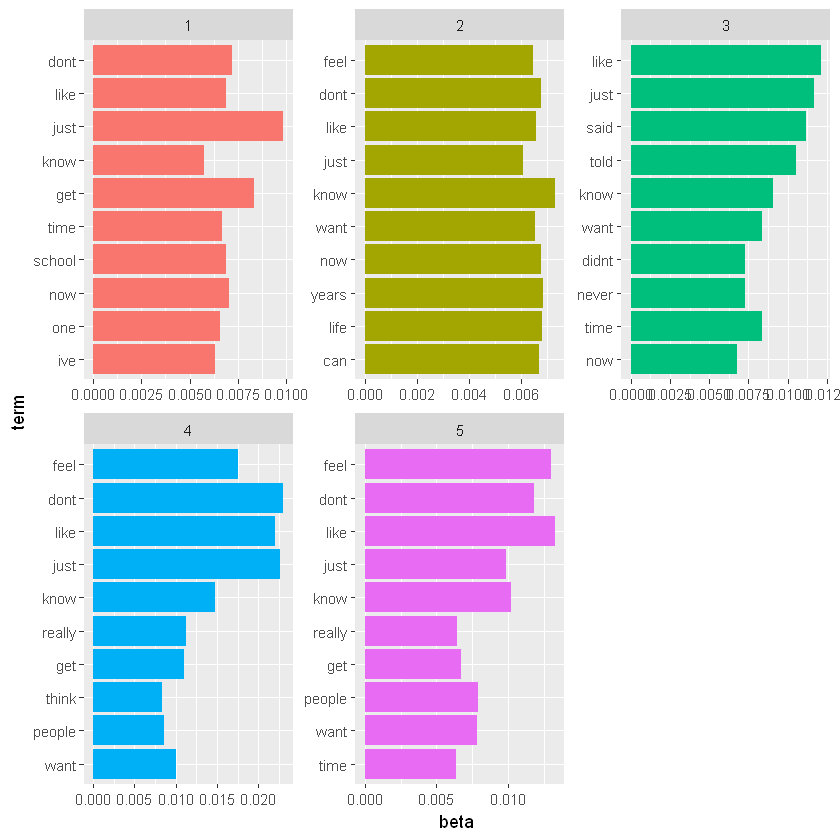

In [41]:
# Graphical representation of Top 10 terms in each of the 5 topics
top_terms %>%
  mutate(term = reorder(term, beta)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip()

In [42]:
# The following words doesn't seem important in this context and hence can be removed : just, said, know, told
wordstoremove <- c("just", "said", "know", "told")
data_sub <- as.data.frame(sapply(data, function(x) gsub(paste(wordstoremove, collapse = '|'), '', x)))
corpus <- Corpus(VectorSource(data_sub$q_content), readerControl=list(language="en"))
dtm.new <- DocumentTermMatrix(corpus, control = list(stopwords = TRUE, minWordLength = 2, removeNumbers = TRUE, removePunctuation = TRUE,  stemDocument = TRUE))
dim(dtm.new)

[1]  1000 14227

In [43]:
# Function to find the Top 10 terms for different topic counts
perform_lda <- function(no_of_topics) {
    # k is the number of topics to be found
    lda <- LDA(dtm.new, k = no_of_topics)
    # per-topic-per-word probabilities are displayed in the column "beta"
    lda_td <- tidy(lda)
    # Top 10 terms in each of the 5 topics
    top_terms <- lda_td %>%
      group_by(topic) %>%
      top_n(10, beta) %>%
      ungroup() %>%
      arrange(topic, -beta)
    # Graphical representation of Top 10 terms in each of the 5 topics
    top_terms %>%
      mutate(term = reorder(term, beta)) %>%
      ggplot(aes(term, beta, fill = factor(topic))) +
      geom_bar(stat = "identity", show.legend = FALSE) +
      facet_wrap(~ topic, scales = "free") +
      coord_flip()
}

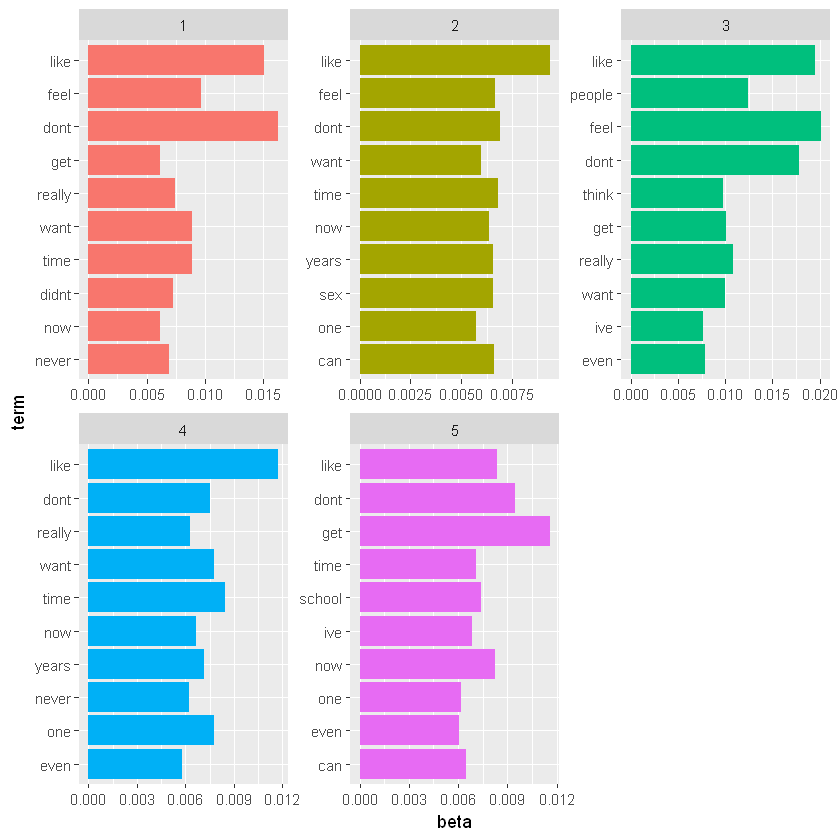

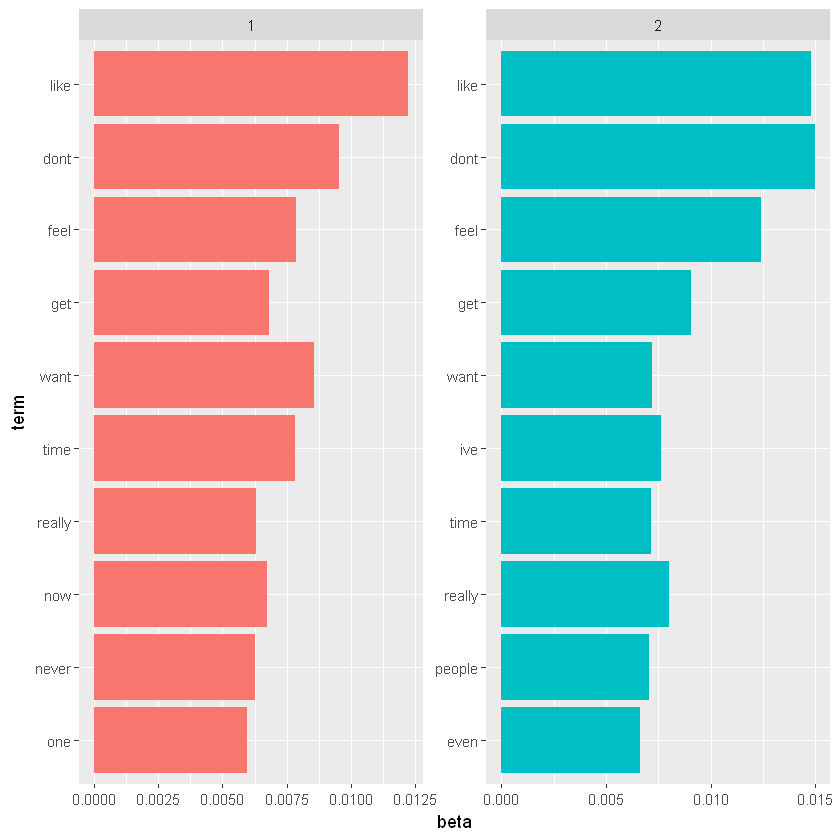

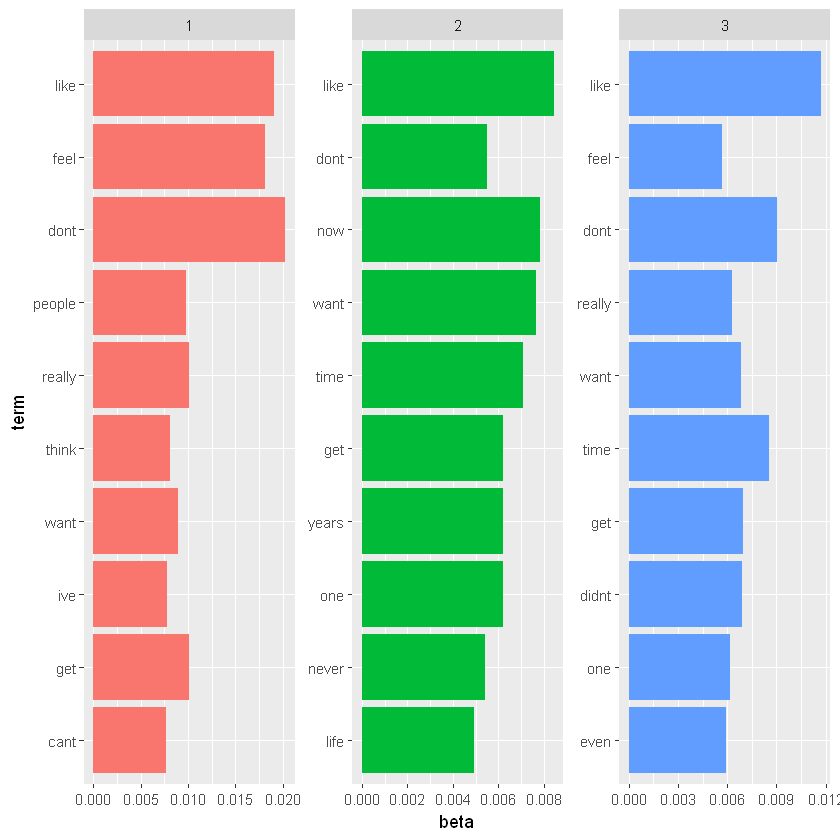

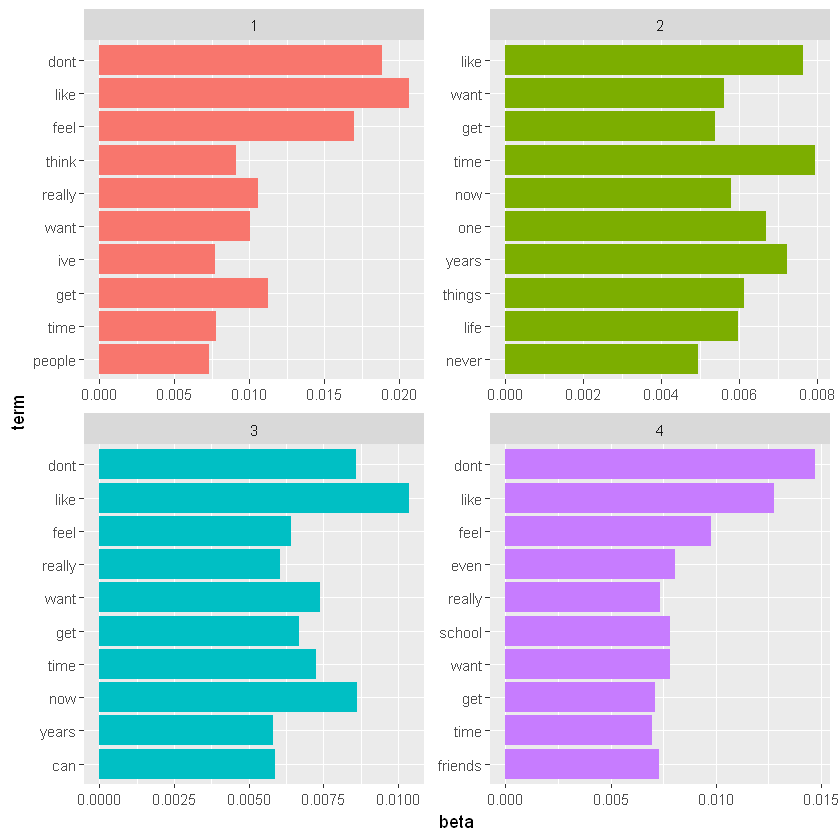

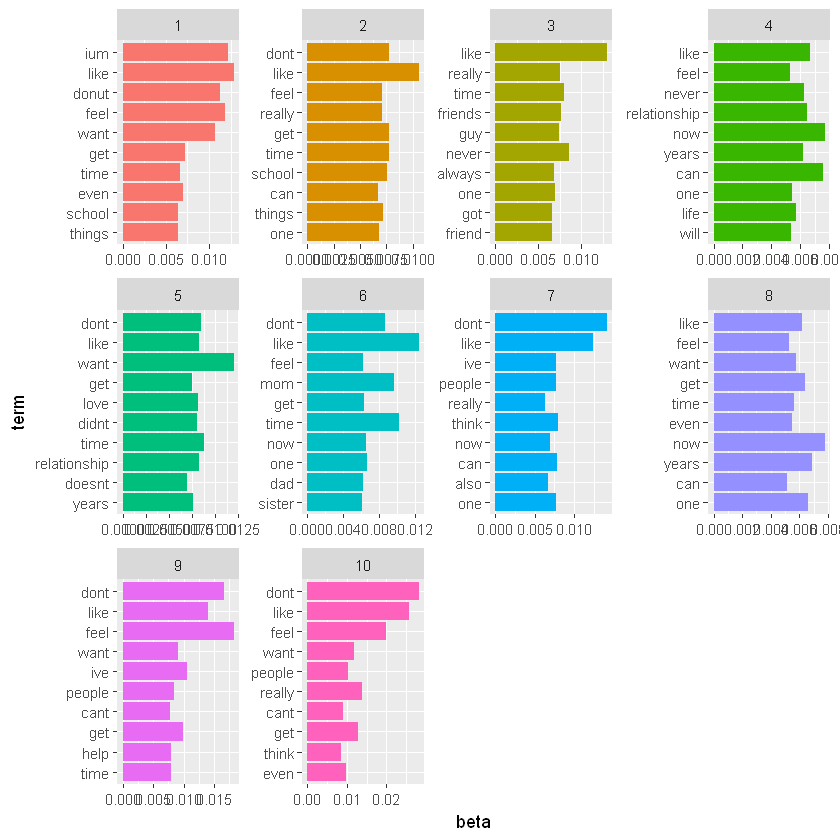

In [44]:
# Trying for different number of topics. "perform_lda" is a function we created in the previous cell
perform_lda(5)
perform_lda(2)
perform_lda(3)
perform_lda(4)
perform_lda(10)

<h1 style="color:blue; text-align:center;">Topic Modeling on answers</h1>

In [45]:
data <- data[1:1000,] # We perform LDA on the rows 1 through 1000 in the data.

In [46]:
# Collection of documents is a corpus
corpus <- Corpus(VectorSource(data$answers), readerControl=list(language="en"))

In [47]:
# Creates a matrix which describes the frequency of terms that occur in a collection of documents.
dtm <- DocumentTermMatrix(corpus, control = list(stopwords = TRUE, minWordLength = 2, removeNumbers = TRUE, removePunctuation = TRUE,  stemDocument = TRUE))

In [48]:
rowTotals <- apply(dtm , 1, sum) #Find the sum of words in each Document

In [49]:
dtm.new   <- dtm[rowTotals> 0, ] #remove all docs without words

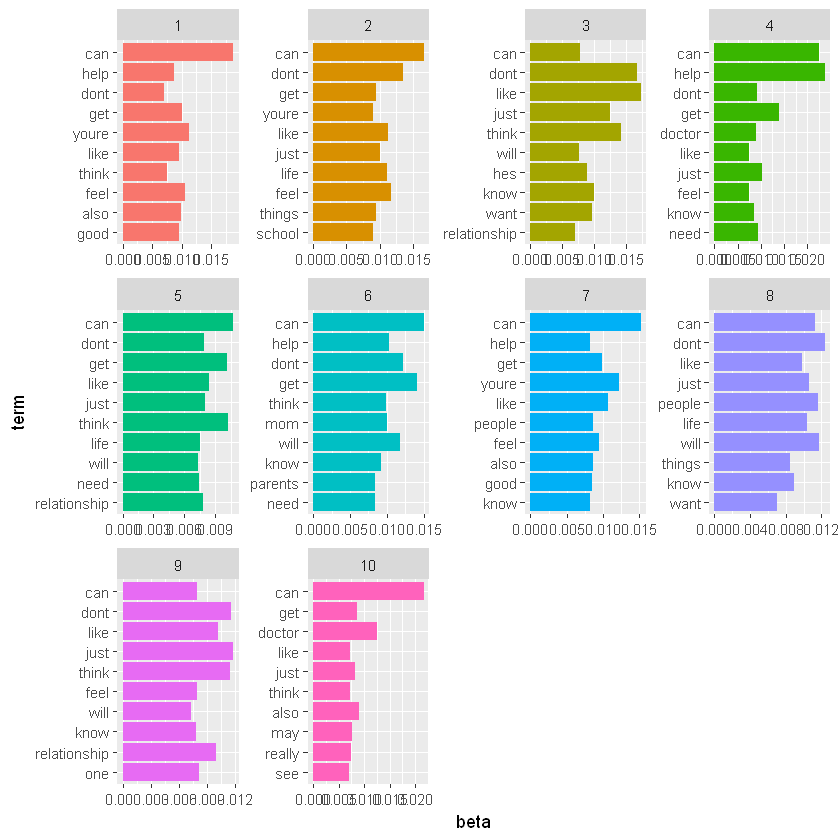

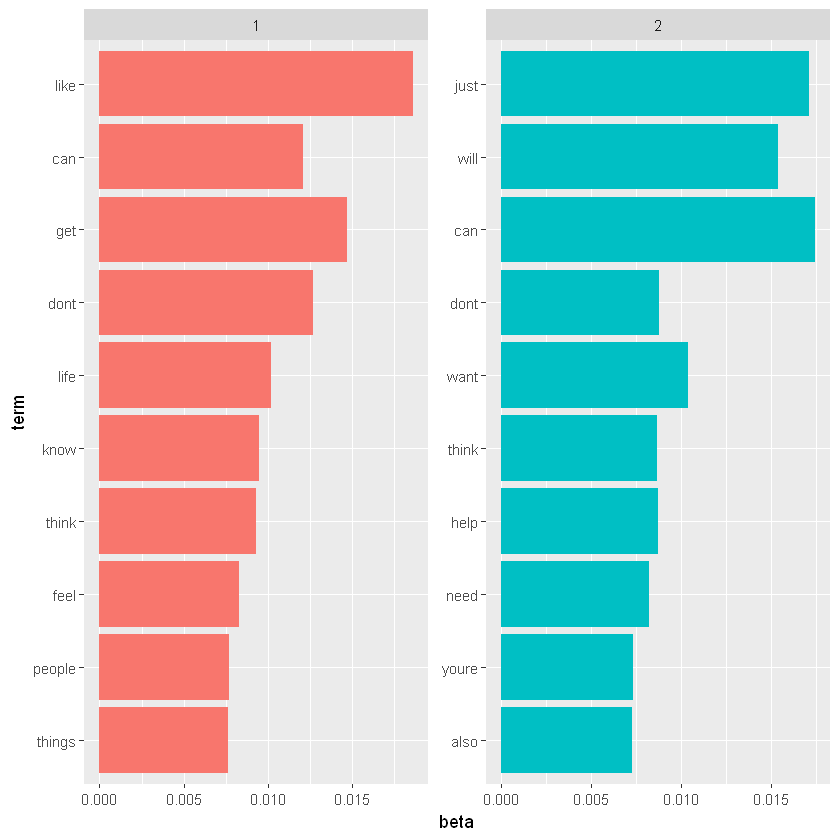

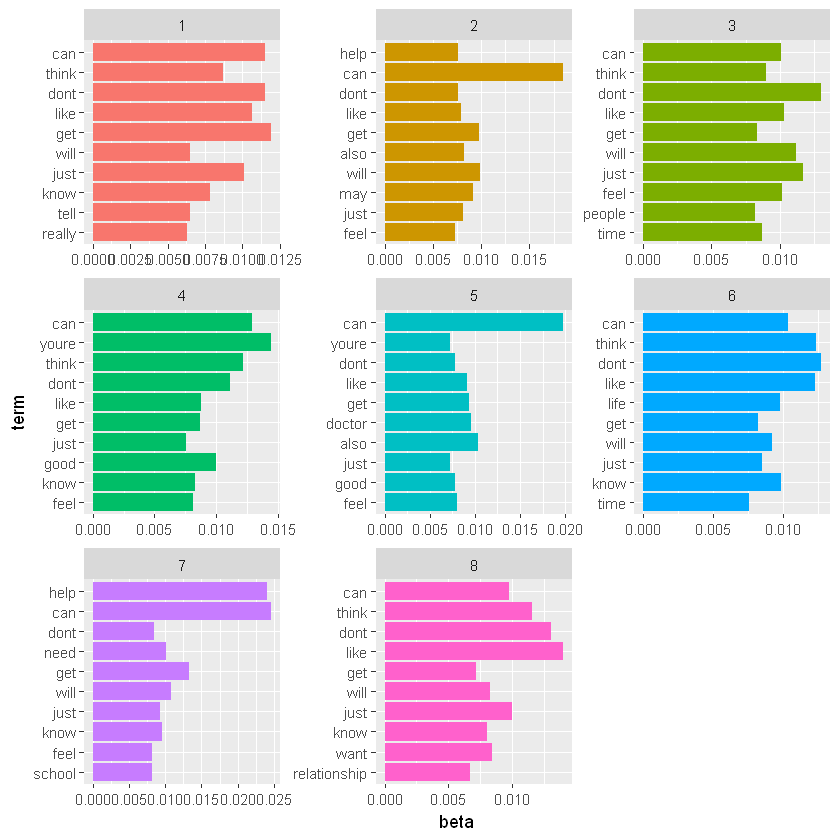

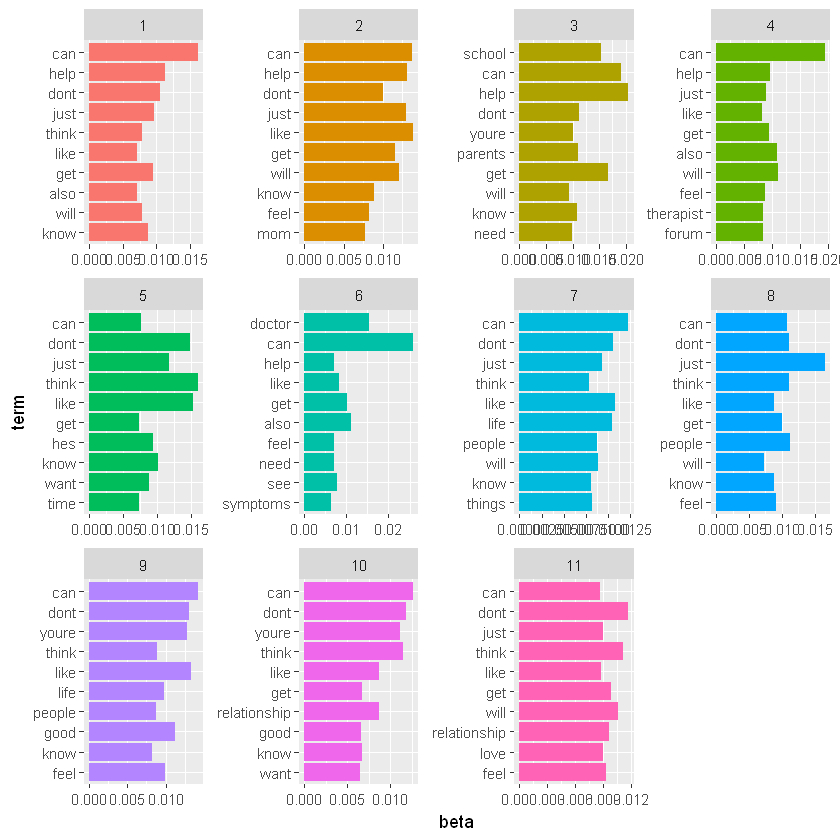

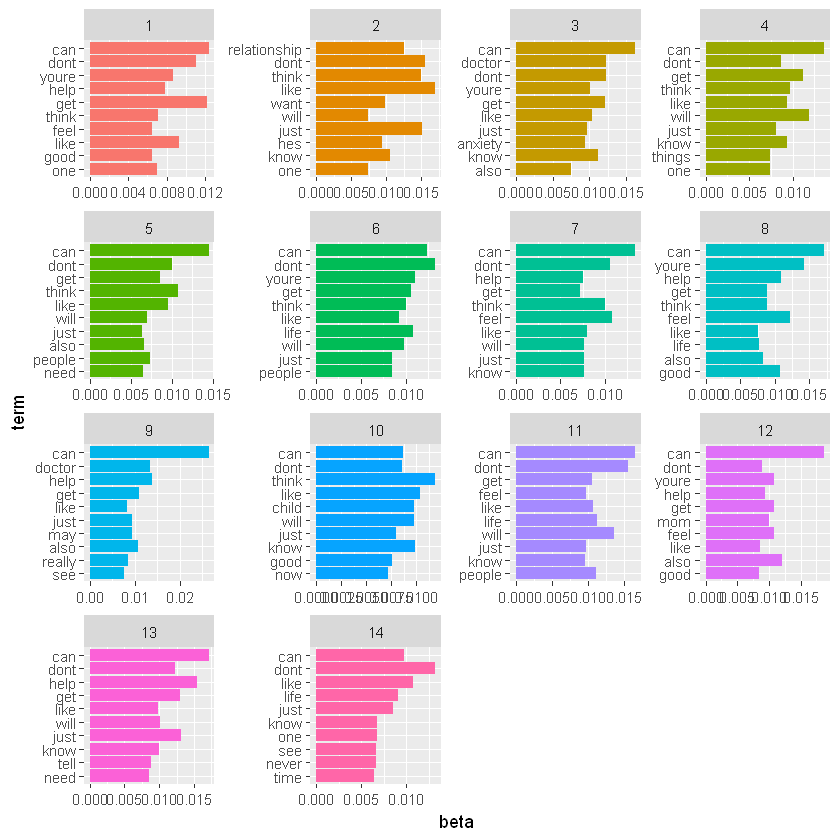

In [50]:
# Trying for different number of topics. "perform_lda" is a function we created in previously.
perform_lda(10)
perform_lda(2)
perform_lda(8)
perform_lda(11)
perform_lda(14)